# Data Collection & Cleaning

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Load Dataset
df = pd.read_csv("weather_2016_2020_daily.csv")

#Cleaning the dataset
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(full_date_range)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

#Handle Mising values by using ffill(Forward Fill) and bfill(Backward Fill)
df.interpolate(method='linear', inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7912\2858736915.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_7912\2858736915.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [4]:
df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00,2.0
1,2016-01-07,1.0,94.0,84.9,76.0,76.0,74.0,72.0,94.0,71.6,51.0,13.0,5.7,0.0,29.9,29.9,29.8,0.00,3.0
2,2016-01-08,1.0,97.0,86.5,75.0,76.0,73.3,67.0,96.0,67.3,37.0,20.0,6.0,0.0,30.0,29.9,29.9,0.00,4.0
3,2016-01-09,1.0,96.0,86.2,78.0,75.0,73.3,70.0,88.0,67.1,46.0,13.0,6.3,0.0,29.8,29.8,29.7,0.01,5.0
4,2016-01-10,1.0,81.0,71.1,61.0,64.0,59.4,57.0,90.0,68.7,45.0,8.0,3.3,0.0,30.0,29.9,29.9,0.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,2020-12-04,12.0,89.0,79.5,69.0,74.0,64.0,47.0,88.0,63.0,28.0,18.0,11.8,0.0,29.7,29.5,29.4,0.00,4.0
1795,2020-12-05,12.0,83.0,75.2,67.0,70.0,65.4,61.0,87.0,72.2,54.0,24.0,13.4,0.0,29.9,29.9,29.8,0.00,5.0
1796,2020-12-06,12.0,91.0,79.8,67.0,61.0,59.0,57.0,76.0,50.8,34.0,16.0,7.5,0.0,30.1,30.1,30.0,0.00,6.0
1797,2020-12-07,12.0,97.0,86.9,80.0,77.0,74.9,72.0,87.0,68.9,44.0,12.0,6.0,0.0,29.9,29.8,29.7,0.00,0.0


In [5]:
#Convert date column to datetime format and set it as the index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

In [6]:
df

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Date,,,,,,,,,,,,,,,,,,
2016-01-06,1.0,85.0,74.8,68.0,74.0,71.4,66.0,100.0,89.4,65.0,21.0,9.5,0.0,29.8,29.8,29.7,0.00,2.0
2016-01-07,1.0,94.0,84.9,76.0,76.0,74.0,72.0,94.0,71.6,51.0,13.0,5.7,0.0,29.9,29.9,29.8,0.00,3.0
2016-01-08,1.0,97.0,86.5,75.0,76.0,73.3,67.0,96.0,67.3,37.0,20.0,6.0,0.0,30.0,29.9,29.9,0.00,4.0
2016-01-09,1.0,96.0,86.2,78.0,75.0,73.3,70.0,88.0,67.1,46.0,13.0,6.3,0.0,29.8,29.8,29.7,0.01,5.0
2016-01-10,1.0,81.0,71.1,61.0,64.0,59.4,57.0,90.0,68.7,45.0,8.0,3.3,0.0,30.0,29.9,29.9,0.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04,12.0,89.0,79.5,69.0,74.0,64.0,47.0,88.0,63.0,28.0,18.0,11.8,0.0,29.7,29.5,29.4,0.00,4.0
2020-12-05,12.0,83.0,75.2,67.0,70.0,65.4,61.0,87.0,72.2,54.0,24.0,13.4,0.0,29.9,29.9,29.8,0.00,5.0
2020-12-06,12.0,91.0,79.8,67.0,61.0,59.0,57.0,76.0,50.8,34.0,16.0,7.5,0.0,30.1,30.1,30.0,0.00,6.0


# Identifying Patterns and Seasonality

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

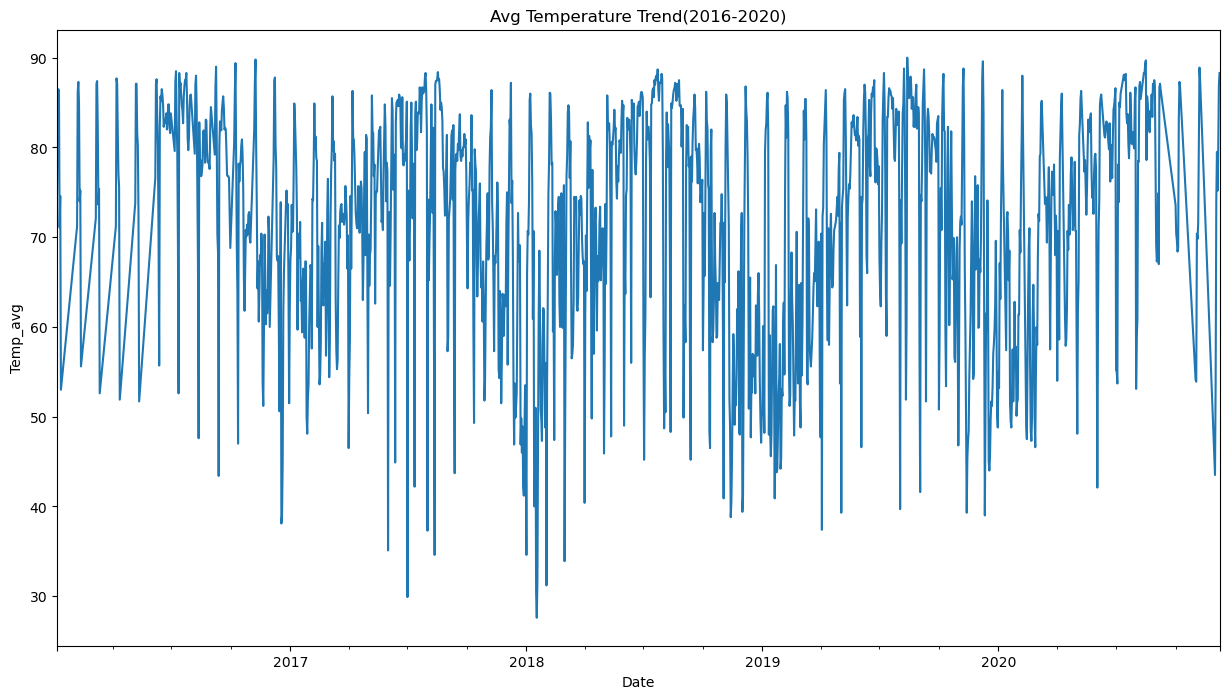

In [8]:
#Select the average temperature as target variable
target_column = 'Temp_avg'

#Visualizing average temperature trends
plt.figure(figsize=(15, 8))
df[target_column].plot(title='Avg Temperature Trend(2016-2020)', xlabel='Date', ylabel='Temp_avg')
plt.show()

In [9]:
#Correlation Analysis
df.corr()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
Day,1.000000,0.087102,0.060492,0.038385,0.040047,0.028046,0.010528,-0.047609,-0.080482,-0.103617,0.040426,0.027054,0.033150,0.011892,0.054632,0.119591,-0.110080,-0.009320
Temp_max,0.087102,1.000000,0.970602,0.882938,0.850096,0.854165,0.813404,0.133597,-0.084764,-0.200459,-0.043278,-0.240477,-0.188889,-0.561234,-0.364127,0.117738,-0.111805,0.016723
Temp_avg,0.060492,0.970602,1.000000,0.955107,0.907610,0.923544,0.889951,0.166447,0.023367,-0.044325,0.005489,-0.149953,-0.106423,-0.620792,-0.431830,0.069343,-0.063877,0.015495
Temp_min,0.038385,0.882938,0.955107,1.000000,0.894526,0.932668,0.941334,0.190437,0.152865,0.118769,0.027449,-0.075957,-0.014489,-0.639822,-0.455951,0.022317,-0.014439,0.012384
Dew_max,0.040047,0.850096,0.907610,0.894526,1.000000,0.970946,0.899985,0.447130,0.369329,0.263023,0.115433,-0.057624,-0.070922,-0.663070,-0.512956,0.028085,0.034317,0.021373
Dew_avg,0.028046,0.854165,0.923544,0.932668,0.970946,1.000000,0.964521,0.438616,0.401747,0.303712,0.059778,-0.098938,-0.070322,-0.684099,-0.518186,0.004852,0.036593,0.015507
Dew_min,0.010528,0.813404,0.889951,0.941334,0.899985,0.964521,1.000000,0.392955,0.386644,0.322358,0.003304,-0.123694,-0.065497,-0.665420,-0.484870,-0.020856,0.041318,0.008687
Hum_max,-0.047609,0.133597,0.166447,0.190437,0.447130,0.438616,0.392955,1.000000,0.767007,0.528904,-0.017097,-0.165718,-0.195155,-0.321577,-0.322863,-0.119467,0.155010,0.004338
Hum_avg,-0.080482,-0.084764,0.023367,0.152865,0.369329,0.401747,0.386644,0.767007,1.000000,0.898517,0.128150,0.073639,0.047065,-0.319338,-0.341506,-0.167034,0.267810,0.001215
Hum_min,-0.103617,-0.200459,-0.044325,0.118769,0.263023,0.303712,0.322358,0.528904,0.898517,1.000000,0.177595,0.236030,0.194250,-0.249614,-0.295993,-0.197748,0.277428,-0.007973


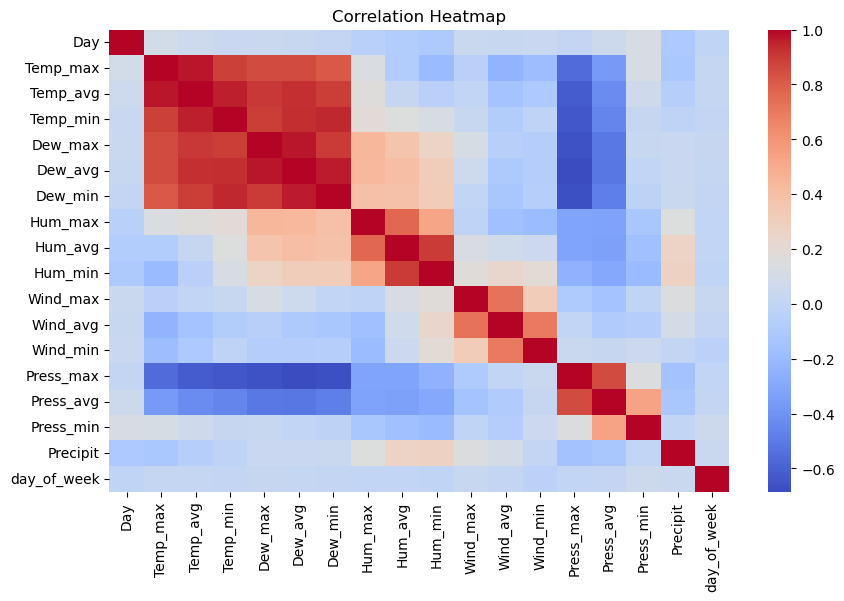

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing & Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#Scaling the features for better model performance
scaler = StandardScaler()
features = df.drop(columns=[target_column])
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=df.index)

# Training Multiple Models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
#Splitting dataset
X = features_scaled
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

#Tain and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R_squared Score": r2_score(y_test, y_pred)
    }
    print(f"\n{name} Model Performance:")
    print(f"MAE: {results[name]['MAE']:.2f}")
    print(f"MSE: {results[name]['MSE']:.2f}")
    print(f"R_squared Score: {results[name]['R_squared Score']:.2f}")


Linear Regression Model Performance:
MAE: 0.37
MSE: 0.30
R_squared Score: 1.00

Decision Tree Model Performance:
MAE: 1.30
MSE: 3.31
R_squared Score: 0.98

Random Forest Model Performance:
MAE: 0.90
MSE: 1.52
R_squared Score: 0.99

XGBoost Model Performance:
MAE: 0.85
MSE: 1.42
R_squared Score: 0.99


# Training a Time-Series Model (OLS)

In [15]:
import statsmodels.api as sm

In [16]:
#Train Time-Series Model (OLS)
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
y_pred_ols = ols_model.predict(sm.add_constant(X_test))

print("\nTime-Series Model Summary (OLS):\n", ols_model.summary())


Time-Series Model Summary (OLS):
                             OLS Regression Results                            
Dep. Variable:               Temp_avg   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.985e+04
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:03:54   Log-Likelihood:                -1049.6
No. Observations:                1439   AIC:                             2135.
Df Residuals:                    1421   BIC:                             2230.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          

# Compare the models and select the best one

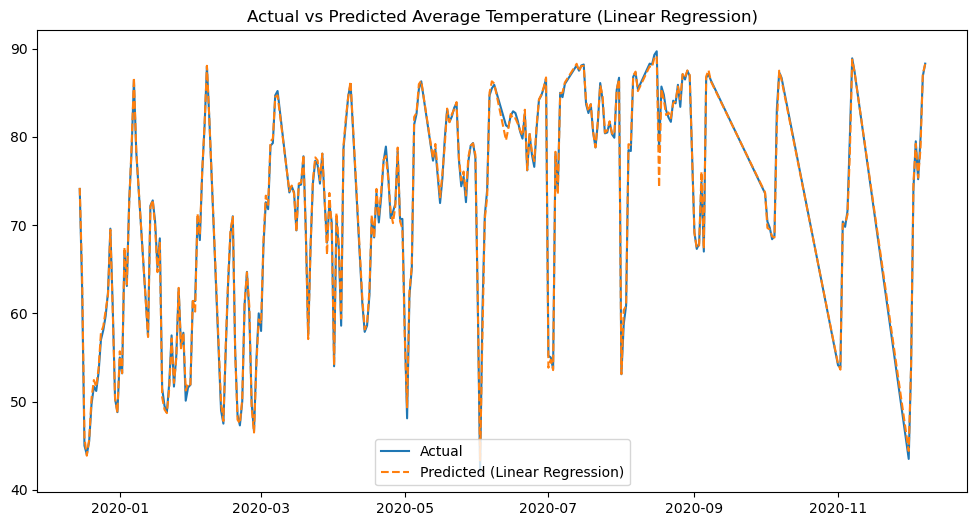


Best Performing Model: Linear Regression


In [17]:
#Finding the best model based on R_squared Score
best_model = max(results, key=lambda x: results[x]["R_squared Score"])
best_model_instance = models[best_model]
y_best_pred = best_model_instance.predict(X_test)

#Plotting the actual vs predicted values for the best model
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_best_pred, label=f"Predicted ({best_model})", linestyle="dashed")
plt.title(f"Actual vs Predicted Average Temperature ({best_model})")
plt.legend()
plt.show()

print(f"\nBest Performing Model: {best_model}")

# Data forecasting using Prophet

In [20]:
#reload the original dataset
df_or = pd.read_csv("weather_2016_2020_daily.csv")

#construct a new dataframe that contain the date and the target variable
df_prophet = df_or[["Date", "Temp_avg"]].copy()

df_prophet

,Date,Temp_avg
0,2016-01-06,74.8
1,2016-02-06,71.2
2,2016-03-06,72.1
3,2016-04-06,71.2
4,2016-05-06,73.8
...,...,...
1547,2020-08-26,83.4
1548,2020-08-27,87.1
1549,2020-08-28,86.5
1550,2020-08-29,87.5


In [21]:
#rename the date column as ds and the target variable as y
df_prophet.rename(columns={"Date":"ds", "Temp_avg":"y"}, inplace=True)

df_prophet

,ds,y
0,2016-01-06,74.8
1,2016-02-06,71.2
2,2016-03-06,72.1
3,2016-04-06,71.2
4,2016-05-06,73.8
...,...,...
1547,2020-08-26,83.4
1548,2020-08-27,87.1
1549,2020-08-28,86.5
1550,2020-08-29,87.5


In [22]:
#specify the amount of the dataset to be used for training
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]
print(f"Train Size: {len(train)}, Test Size: {len(test)}")

Train Size: 1241, Test Size: 311


In [23]:
from prophet import Prophet

#load the Prophet model
model = Prophet()
model.fit(train)

20:55:17 - cmdstanpy - INFO - Chain [1] start processing
20:55:17 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
#overfit and finetune the model
overfit_model = Prophet(changepoint_prior_scale=0.5)
overfit_model.fit(train)

tuned_model = Prophet(changepoint_prior_scale=0.05, seasonality_mode="additive")
tuned_model.fit(train)

20:56:07 - cmdstanpy - INFO - Chain [1] start processing
20:56:07 - cmdstanpy - INFO - Chain [1] done processing
20:56:08 - cmdstanpy - INFO - Chain [1] start processing
20:56:08 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
#forecast future average tempearture for the period of 5 years, yhat contains the forecasted values
future = model.make_future_dataframe(periods=2190, freq="D")
forecast = tuned_model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds       yhat  yhat_lower  yhat_upper
3426 2025-12-04  96.958487   77.929209  115.737949
3427 2025-12-05  97.418620   80.388790  116.665685
3428 2025-12-06  97.866849   78.011623  117.075429
3429 2025-12-07  97.028519   80.038759  115.893514
3430 2025-12-08  96.395749   78.916664  114.068289


C:\Users\USER\Documents\Python Scripts\lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\Documents\Python Scripts\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


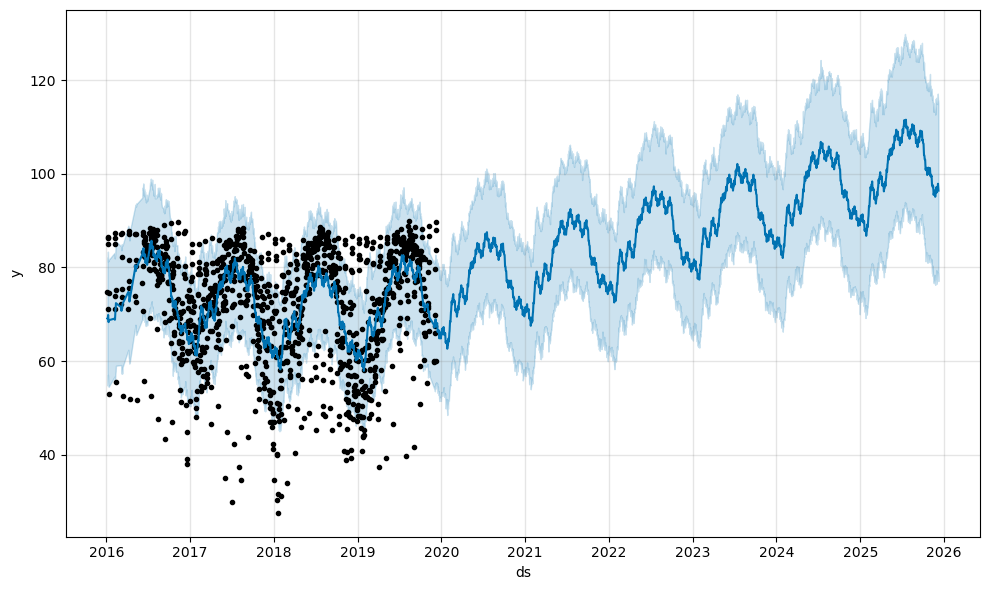

C:\Users\USER\Documents\Python Scripts\lib\site-packages\prophet\plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\Documents\Python Scripts\lib\site-packages\prophet\plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\USER\Documents\Python Scripts\lib\site-packages\prophet\plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

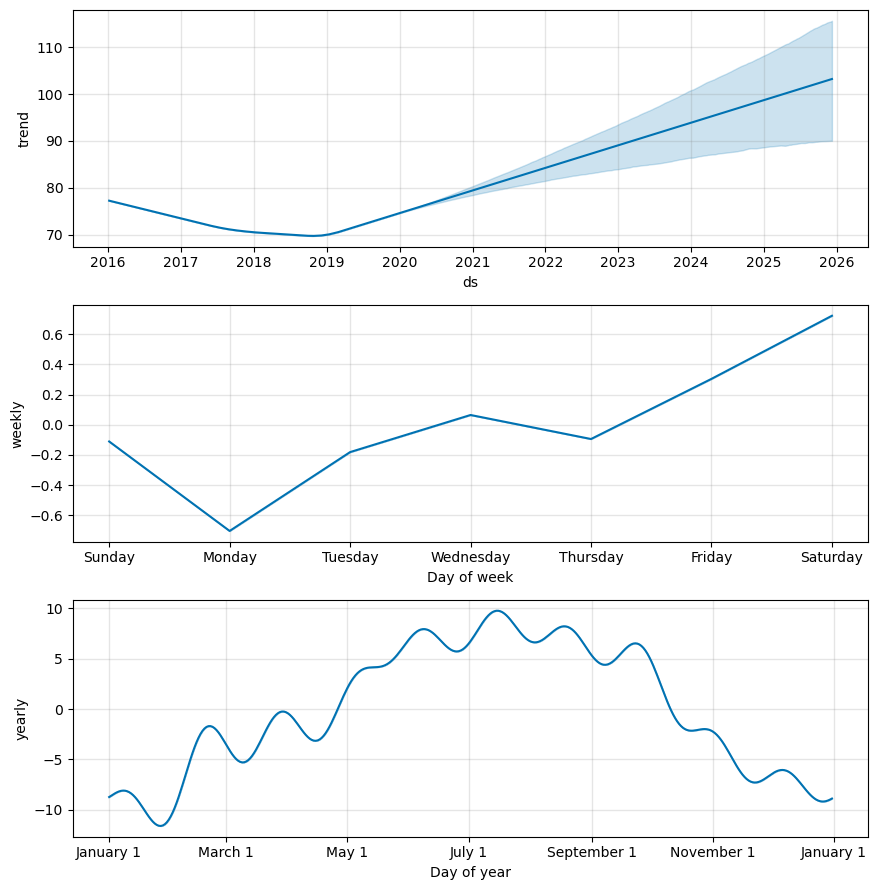

In [29]:
#visualize trends of the forecasted dataset
tuned_model.plot(forecast)
plt.show()

tuned_model.plot_components(forecast)
plt.show()

In [34]:
#display the forecasted average tempearture values of the 2024-12-09 to 2025-12-08
forecast_365 = forecast.iloc[-365:]
pd.set_option('display.max_rows',None)
print(forecast_365[['ds','yhat','yhat_lower','yhat_upper']])

             ds        yhat  yhat_lower  yhat_upper
3066 2024-12-09   91.475397   75.038973  108.963296
3067 2024-12-10   91.882522   75.653452  108.443312
3068 2024-12-11   91.981867   77.501657  108.484765
3069 2024-12-12   91.648445   75.488028  108.727710
3070 2024-12-13   91.850577   76.653627  107.470473
3071 2024-12-14   92.054656   77.060234  108.667379
3072 2024-12-15   90.994023   75.290138  108.156873
3073 2024-12-16   90.168054   74.326299  106.381108
3074 2024-12-17   90.459284   75.198193  107.744590
3075 2024-12-18   90.480270   75.014004  106.732884
3076 2024-12-19   90.108553   74.867362  107.158707
3077 2024-12-20   90.313674   73.697216  107.867338
3078 2024-12-21   90.561894   74.724968  106.773855
3079 2024-12-22   89.585066   72.575103  106.362607
3080 2024-12-23   88.879772   72.048421  106.131980
3081 2024-12-24   89.324528   72.251157  108.043968
3082 2024-12-25   89.526767   73.298675  105.044140
3083 2024-12-26   89.357969   73.556963  105.819879
3084 2024-12

# Summary

## The objective is to determine the best model for predicting the average tempearture in the dataset. The following processes are followed:

### 1. Data collectetion and cleaning: The dataset is being read using pandas and the cleaning is done by using the forward and backward fill methods.
### 2. Patterns and sesonality are being identified by visualizing the average temperature trends and the correlation of each variables of the dataset.
### 3. Features are being scaled for better model performance.
### 4. Multiple models are being trained and their performances are being evaluated based on their mean absolute error, mean squared error, and R_squared Scores.
### 5. The model with the lowest mean absolute and mean squared errors and that has R_squared value closest to one is considered the best model for the prediction of the average temperature from the dataset.
### 6. The Linear Regtression model is considered the best model because it met the above criteria.
### 7. Data Forecasting is being performed using the dependency "Prophet".
### 8. From the dataset the average temperatures of the next five years was determined.
### 9. The trend plots of the forecasted values are being visualized.
### 10. The average tempearture values of the 2024-12-09 to 2025-12-08 was displayed.